In [ ]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install seaborn
%pip install matplotlib

## **1. Import the data**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
dynamic_data = pd.read_csv('sph_dynamic.csv')

In [3]:
static_data = pd.read_csv('sph_static.csv')

## **2. Data preprocessing**

2.1 Missing Values

In [4]:
# Missing Values in Dynamic Table
dynamic_data.isnull().sum()

stay_id                   0
charttime                 0
total_protein          6930
calcium                 933
creatinine              261
glucose                 444
sodium                  214
chloride                241
heart_rate             6833
sbp                    6895
dbp                    6895
mbp                    6887
resp_rate              6832
temperature            6974
hemoglobin             1179
wbc                    1207
alt                    3964
ast                    3936
alp                    3976
bilirubin_total        3957
bilirubin_direct       6808
bilirubin_indirect     6812
ph                     7004
lactate                7012
pt                     3068
urineoutput            6942
sofa_respiration       7005
sofa_coagulation       7023
sofa_liver             7023
sofa_cardiovascular    6872
sofa_cns               6979
sofa_renal             7024
dtype: int64

In [5]:
# Drop the columns with more than 80%
for col in dynamic_data.columns:
    if dynamic_data[col].isnull().sum() > len(dynamic_data)*0.8:
        del dynamic_data[col]

In [6]:
dynamic_data.isnull().sum()

stay_id               0
charttime             0
calcium             933
creatinine          261
glucose             444
sodium              214
chloride            241
hemoglobin         1179
wbc                1207
alt                3964
ast                3936
alp                3976
bilirubin_total    3957
pt                 3068
dtype: int64

In [7]:
# ['alt','ast','alp','bilirubin_total','pt'] are liver function related test results
# create a new binary column 'liver_function_test', True/1 means have ever taken liver function test
liver_test_result = ['alt','ast','alp','bilirubin_total','pt']
def liver_categorize(group):
    flag = True
    for i in liver_test_result:
        if group[i].notnull().any():
            flag = False
    if flag:
        group['liver_function_test'] = False
    else:
        group['liver_function_test'] = True
    return group

dynamic_data = dynamic_data.groupby('stay_id').apply(liver_categorize)

/var/folders/hz/y0b7zd116rs3w_v_g_pxz33c0000gn/T/ipykernel_28601/240455136.py:15: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  dynamic_data = dynamic_data.groupby('stay_id').apply(liver_categorize)


In [8]:
dynamic_data

stay_id                charttime  calcium  creatinine  glucose  sodium  \
0     35715575  2148-12-27 18:15:00.000      8.5         0.9    137.0   138.0   
1     34483718  2118-01-04 03:58:00.000      8.2         0.8    129.0   141.0   
2     31826892  2163-03-10 19:59:00.000      7.7         0.4    112.0   136.0   
3     36154799  2131-12-02 19:14:00.000      NaN         NaN      NaN     NaN   
4     32732521  2116-08-12 12:45:00.000      NaN         4.0    135.0   139.0   
...        ...                      ...      ...         ...      ...     ...   
7019  31292653  2192-03-18 03:14:00.000      NaN         1.4    102.0   137.0   
7020  32964221  2127-01-30 10:00:00.000      8.6         0.5    112.0   139.0   
7021  33493321  2142-07-28 06:02:00.000      NaN         1.1    130.0   142.0   
7022  38658392  2189-05-17 00:13:00.000      7.3         1.0    174.0   133.0   
7023  37805633  2172-07-28 21:25:00.000      8.3         0.9    155.0   144.0   

      chloride  hemoglobin   wbc   alt   ast    alp  bilirubin_total    pt  \
0        104.0         NaN   NaN   NaN   NaN    NaN              NaN   NaN   
1        101.0         8.7  11.3   NaN   NaN    NaN              NaN  12.1   
2         98.0         NaN   NaN   NaN   NaN    NaN              NaN   NaN   
3          NaN        12.3   NaN   NaN   NaN    NaN              NaN   NaN   
4        105.0         NaN   NaN   NaN   NaN    NaN              NaN   NaN   
...        ...         ...   ...   ...   ...    ...              ...   ...   
7019     103.0         8.7   4.9   NaN   NaN    NaN              NaN   NaN   
7020     107.0         8.9  14.3  14.0  32.0  148.0              2.6   NaN   
7021     105.0         8.4   4.0   NaN   NaN    NaN              NaN   NaN   
7022      93.0        13.0  19.5   9.0  18.0   48.0              0.5  13.0   
7023     110.0        12.1   5.4   NaN   NaN    NaN              NaN   NaN   

      liver_function_test  
0                    True  
1                    True  
2                    True  
3                    True  
4                    True  
...                   ...  
7019                 True  
7020                 True  
7021                 True  
7022                 True  
7023                False  

[7024 rows x 15 columns]

In [9]:
dynamic_data.describe()

stay_id      calcium   creatinine      glucose       sodium  \
count  7.024000e+03  6091.000000  6763.000000  6580.000000  6810.000000   
mean   3.497892e+07     8.389640     1.644019   142.289666   137.309545   
std    2.832325e+06     0.820066     1.839893    89.875986     5.638384   
min    3.000414e+07     4.200000     0.100000    30.000000    83.000000   
25%    3.255070e+07     7.900000     0.800000   102.000000   134.000000   
50%    3.496990e+07     8.400000     1.100000   125.000000   138.000000   
75%    3.746081e+07     8.900000     1.800000   159.000000   141.000000   
max    3.999217e+07    12.300000    19.700000  2970.000000   185.000000   

          chloride   hemoglobin          wbc           alt           ast  \
count  6783.000000  5845.000000  5817.000000   3060.000000   3088.000000   
mean    102.067079    10.043353    10.973130    161.859150    243.882772   
std       6.731008     2.177573     8.228807    752.898832   1216.527439   
min      62.000000     3.900000     0.100000      1.000000      5.000000   
25%      98.000000     8.400000     5.900000     17.000000     22.000000   
50%     102.000000     9.800000     9.400000     30.000000     42.000000   
75%     106.000000    11.400000    14.200000     62.000000     95.000000   
max     153.000000    18.400000   125.200000  15018.000000  28275.000000   

               alp  bilirubin_total           pt  
count  3048.000000      3067.000000  3956.000000  
mean    131.933727         4.248745    18.826567  
std     123.088598         7.808056    11.588015  
min       7.000000         0.100000     9.200000  
25%      65.000000         0.500000    12.800000  
50%      92.000000         1.000000    14.900000  
75%     149.000000         3.600000    20.400000  
max    1185.000000        52.600000   150.000000

In [ ]:
# Assume that patients with no relevant results recorded don't have liver issues
# so we impute these patients' missing values of these columns with random number in normal range

# but i can not find the unit and normal range for them so i drop them first >_<
# dynamic_data.drop(['alt','ast','alp','bilirubin_total','pt'], axis = 1, inplace = True)

In [10]:
dynamic_data.isnull().sum()

stay_id                   0
charttime                 0
calcium                 933
creatinine              261
glucose                 444
sodium                  214
chloride                241
hemoglobin             1179
wbc                    1207
alt                    3964
ast                    3936
alp                    3976
bilirubin_total        3957
pt                     3068
liver_function_test       0
dtype: int64

In [11]:
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'alt'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'ast'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'alp'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'bilirubin_total'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'pt'].describe())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: alt, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: ast, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: alp, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: bilirubin_total, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: pt, dtype: float64


In [ ]:
dynamic_data

In [12]:
dynamic_backup = dynamic_data.copy()

In [13]:
# Normalization before using KNN Imputer
# Select only numeric columns
numeric_cols = dynamic_data.iloc[:,2:].select_dtypes(include=np.number).columns.tolist()

# Scale the numeric columns using StandardScaler
scaler1 = StandardScaler()
scaled_df1 = scaler1.fit_transform(dynamic_data.iloc[:,2:][numeric_cols])

# Create a new dataframe with the scaled numeric columns
scaled_df1 = pd.DataFrame(scaled_df1, columns=numeric_cols,index =dynamic_data.iloc[:,2:].index )

In [14]:
# use KNN to impute the rest
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 10)
scaled_df1 = imputer.fit_transform(scaled_df1)
scaled_df1 = pd.DataFrame(scaled_df1, columns=numeric_cols,index =dynamic_data.iloc[:,2:].index )

In [15]:
scaled_df1 = scaler1.inverse_transform(scaled_df1)
scaled_df1 = pd.DataFrame(scaled_df1, columns=numeric_cols,index =dynamic_data.iloc[:,2:].index )

In [16]:
for col in numeric_cols:
    dynamic_data[col] = scaled_df1[col]

In [17]:
dynamic_data.isnull().sum()

stay_id                0
charttime              0
calcium                0
creatinine             0
glucose                0
sodium                 0
chloride               0
hemoglobin             0
wbc                    0
alt                    0
ast                    0
alp                    0
bilirubin_total        0
pt                     0
liver_function_test    0
dtype: int64

In [18]:
dynamic_data.describe()

stay_id      calcium   creatinine      glucose       sodium  \
count  7.024000e+03  7024.000000  7024.000000  7024.000000  7024.000000   
mean   3.497892e+07     8.386991     1.643751   142.732627   137.307130   
std    2.832325e+06     0.776022     1.808830    87.393886     5.563164   
min    3.000414e+07     4.200000     0.100000    30.000000    83.000000   
25%    3.255070e+07     8.000000     0.800000   103.000000   134.000000   
50%    3.496990e+07     8.400000     1.100000   127.000000   138.000000   
75%    3.746081e+07     8.800000     1.800000   159.000000   141.000000   
max    3.999217e+07    12.300000    19.700000  2970.000000   185.000000   

          chloride   hemoglobin          wbc           alt           ast  \
count  7024.000000  7024.000000  7024.000000   7024.000000   7024.000000   
mean    102.051679    10.118657    11.082677    144.259483    254.936041   
std       6.643649     2.033708     7.564724    520.186941    887.497543   
min      62.000000     3.900000     0.100000      1.000000      5.000000   
25%      98.000000     8.600000     6.700000     29.800000     40.000000   
50%     102.000000    10.000000    10.100000     55.200000     83.000000   
75%     106.000000    11.400000    13.900000     95.000000    193.675000   
max     153.000000    18.400000   125.200000  15018.000000  28275.000000   

               alp  bilirubin_total           pt  
count  7024.000000      7024.000000  7024.000000  
mean    138.940057         3.938319    18.573256  
std      88.565223         5.713868     9.053248  
min       7.000000         0.100000     9.200000  
25%      87.000000         0.900000    13.827500  
50%     126.400000         1.840000    16.310000  
75%     165.000000         4.700000    20.380000  
max    1185.000000        52.600000   150.000000

In [19]:
dynamic_backup.describe()

stay_id      calcium   creatinine      glucose       sodium  \
count  7.024000e+03  6091.000000  6763.000000  6580.000000  6810.000000   
mean   3.497892e+07     8.389640     1.644019   142.289666   137.309545   
std    2.832325e+06     0.820066     1.839893    89.875986     5.638384   
min    3.000414e+07     4.200000     0.100000    30.000000    83.000000   
25%    3.255070e+07     7.900000     0.800000   102.000000   134.000000   
50%    3.496990e+07     8.400000     1.100000   125.000000   138.000000   
75%    3.746081e+07     8.900000     1.800000   159.000000   141.000000   
max    3.999217e+07    12.300000    19.700000  2970.000000   185.000000   

          chloride   hemoglobin          wbc           alt           ast  \
count  6783.000000  5845.000000  5817.000000   3060.000000   3088.000000   
mean    102.067079    10.043353    10.973130    161.859150    243.882772   
std       6.731008     2.177573     8.228807    752.898832   1216.527439   
min      62.000000     3.900000     0.100000      1.000000      5.000000   
25%      98.000000     8.400000     5.900000     17.000000     22.000000   
50%     102.000000     9.800000     9.400000     30.000000     42.000000   
75%     106.000000    11.400000    14.200000     62.000000     95.000000   
max     153.000000    18.400000   125.200000  15018.000000  28275.000000   

               alp  bilirubin_total           pt  
count  3048.000000      3067.000000  3956.000000  
mean    131.933727         4.248745    18.826567  
std     123.088598         7.808056    11.588015  
min       7.000000         0.100000     9.200000  
25%      65.000000         0.500000    12.800000  
50%      92.000000         1.000000    14.900000  
75%     149.000000         3.600000    20.400000  
max    1185.000000        52.600000   150.000000

In [20]:
# define normal ranges for each column
normal_ranges = {
    'alt': (5, 40),
    'ast': (10, 35),
    'alp': (40, 130),
    'bilirubin_total': (0.1, 1.0),
    'pt': (9.5, 13.5)
}


In [21]:
mask = dynamic_data['liver_function_test'] == False
n_no_test = mask.sum()
def sample_normal(col):
    lower = normal_ranges[col][0]
    upper = normal_ranges[col][1]
    return np.random.normal(loc=(lower+upper)/2, scale=(upper-lower)/6, size=n_no_test)

sampled_alt = sample_normal("alt")
sampled_ast = sample_normal("ast")
sampled_alp = sample_normal("alp")
sampled_bilirubin_total = sample_normal("bilirubin_total")
sampled_pt = sample_normal("pt")
dynamic_data.loc[mask, 'alt'] = sampled_alt
dynamic_data.loc[mask, 'ast'] = sampled_ast
dynamic_data.loc[mask, 'alp'] = sampled_alp
dynamic_data.loc[mask, 'bilirubin_total'] = sampled_bilirubin_total
dynamic_data.loc[mask, 'pt'] = sampled_pt

In [22]:
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'alt'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'ast'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'alp'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'bilirubin_total'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'pt'].describe())

count    349.000000
mean      22.526663
std        5.905969
min        5.237050
25%       18.650871
50%       22.399098
75%       27.049366
max       37.900099
Name: alt, dtype: float64
count    349.000000
mean      22.621621
std        4.289311
min       10.386310
25%       19.644734
50%       22.795106
75%       25.737394
max       34.911184
Name: ast, dtype: float64
count    349.000000
mean      83.428129
std       15.081148
min       41.847402
25%       74.102502
50%       82.581760
75%       93.678397
max      132.732903
Name: alp, dtype: float64
count    349.000000
mean       0.556876
std        0.161264
min        0.068108
25%        0.453341
50%        0.560708
75%        0.665460
max        1.045163
Name: bilirubin_total, dtype: float64
count    349.000000
mean      11.506540
std        0.600267
min        9.376067
25%       11.074017
50%       11.502255
75%       11.955408
max       13.178729
Name: pt, dtype: float64


In [23]:
#to address the same patinent have differrent results at the same charttime
dynamic_data = dynamic_data.groupby(['stay_id','charttime']).mean().reset_index()

## **3. Feature Engineering**

3.1 Gradient 

In [24]:
#compute the gradient
def count_gradient(group):
    testresult = list(dynamic_data.columns)[2:-1]
    for i in testresult:
        if len(group) == 1:
            group[i+'_grad'] = 0
        else:
            time_diff = (group['charttime'].iloc[-1] - group['charttime'].iloc[-2]).total_seconds()
            group[i+'_grad'] = (group[i].iloc[-1] - group[i].iloc[-2]) / time_diff 
    return group

In [25]:
dynamic_data['charttime'] = pd.to_datetime(dynamic_data['charttime'])

In [26]:
dynamic_data.sort_values(by = ['stay_id','charttime'], inplace = True)
dynamic_data = dynamic_data.groupby('stay_id').apply(count_gradient)

/var/folders/hz/y0b7zd116rs3w_v_g_pxz33c0000gn/T/ipykernel_28601/3194640149.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  dynamic_data = dynamic_data.groupby('stay_id').apply(count_gradient)


3.2 Transform to single data point

In [27]:
# take the last values of all timepoints for each patient
dynamic_data_last = dynamic_data.drop(['charttime'],axis = 1).groupby('stay_id').tail(1)

In [28]:
# merge dynamic and static table
data = static_data.merge(dynamic_data_last, on = 'stay_id')

In [29]:
#Converting data type of icu_intime, vent_start and vent_end to date and time format
data['icu_intime'] = pd.to_datetime(data['icu_intime'])
data['vent_start'] = pd.to_datetime(data['vent_start'], format='%m/%d/%y %H:%M')
data['vent_end'] = pd.to_datetime(data['vent_end'], format='%m/%d/%y %H:%M')

In [30]:
data

stay_id          icu_intime          vent_start            vent_end  \
0     30004144 2126-04-04 13:20:25 2026-04-05 16:00:00 2026-04-06 17:00:00   
1     30005366 2202-12-27 17:36:59 2002-12-28 14:00:00 2002-12-28 20:00:00   
2     30006983 2159-10-12 03:56:42 2059-10-12 18:00:00 2059-10-14 19:00:00   
3     30023204 2124-07-09 16:43:55 2024-07-11 16:00:00 2024-07-12 16:10:00   
4     30031418 2156-03-05 14:11:00 2056-03-07 22:06:00 2056-03-08 08:00:00   
...        ...                 ...                 ...                 ...   
1918  39977971 2115-12-11 17:42:45 2015-12-12 12:00:00 2015-12-12 16:00:00   
1919  39982332 2180-03-01 22:35:04 1980-03-02 19:00:00 1980-03-03 08:00:00   
1920  39985110 2141-03-03 05:57:46 2041-03-04 20:44:00 2041-03-06 04:00:00   
1921  39986206 2183-06-19 23:25:31 1983-06-20 22:00:00 1983-06-30 04:00:00   
1922  39992167 2114-06-10 19:00:00 2014-06-11 17:00:00 2014-06-15 05:00:00   

      vent_duration  calcium  creatinine  glucose  sodium  chloride  ...  \
0         25.000000     6.80         0.7    133.0   135.0     102.0  ...   
1          6.000000     8.80         6.7     41.0   139.0     100.0  ...   
2         49.000000     7.10         1.0     89.0   136.0     108.0  ...   
3         24.166667     8.50         1.4    107.0   131.0     100.0  ...   
4          9.900000     7.40         0.4    133.0   139.0     106.0  ...   
...             ...      ...         ...      ...     ...       ...  ...   
1918       4.000000     8.90         2.2     98.0   132.0      97.0  ...   
1919      13.000000     8.29         1.2    119.0   140.0     103.0  ...   
1920      31.266667    10.40         6.8    149.0   139.0      98.0  ...   
1921     222.000000     7.50         6.0    101.0   139.0     103.0  ...   
1922      84.000000     7.50         0.8    136.0   128.0     100.0  ...   

      glucose_grad  sodium_grad  chloride_grad  hemoglobin_grad  wbc_grad  \
0         0.001466     0.000000      -0.000077        -0.000093 -0.000023   
1         0.000000     0.000000       0.000000         0.000000  0.000000   
2        -0.001230     0.000073       0.000110         0.000001  0.000091   
3         0.000403    -0.000050      -0.000201         0.000076 -0.000222   
4         0.000000     0.000000       0.000000         0.000000  0.000000   
...            ...          ...            ...              ...       ...   
1918     -0.003474     0.000100       0.000033        -0.000037 -0.000017   
1919      0.000000     0.000000       0.000000         0.000000  0.000000   
1920      0.000425     0.000018       0.000000         0.000007  0.000052   
1921     -0.000866     0.000000       0.000000         0.000017 -0.000039   
1922      0.001674    -0.000218       0.000000         0.000000 -0.000102   

      alt_grad  ast_grad  alp_grad  bilirubin_total_grad   pt_grad  
0    -0.001937 -0.001798  0.001227              0.000031  0.000093  
1     0.000000  0.000000  0.000000              0.000000  0.000000  
2     0.000055  0.000275 -0.000606              0.000004  0.000031  
3    -0.015952 -0.021621  0.003359              0.000101 -0.000434  
4     0.000000  0.000000  0.000000              0.000000  0.000000  
...        ...       ...       ...                   ...       ...  
1918  0.000825  0.000721 -0.000010              0.000001  0.000010  
1919  0.000000  0.000000  0.000000              0.000000  0.000000  
1920 -0.001013 -0.003093 -0.000708              0.000059  0.000028  
1921  0.004745  0.007000  0.003632              0.000045  0.000013  
1922 -0.006477 -0.007183 -0.005342              0.000131  0.000022  

[1923 rows x 30 columns]

In [31]:
data.dtypes

stay_id                          int64
icu_intime              datetime64[ns]
vent_start              datetime64[ns]
vent_end                datetime64[ns]
vent_duration                  float64
calcium                        float64
creatinine                     float64
glucose                        float64
sodium                         float64
chloride                       float64
hemoglobin                     float64
wbc                            float64
alt                            float64
ast                            float64
alp                            float64
bilirubin_total                float64
pt                             float64
liver_function_test            float64
calcium_grad                   float64
creatinine_grad                float64
glucose_grad                   float64
sodium_grad                    float64
chloride_grad                  float64
hemoglobin_grad                float64
wbc_grad                       float64
alt_grad                 

3.3 Bins for duration catrgory

In [29]:
#bins - 1
# Categorize vent_duration 
data['vent_duration_category'] = pd.cut(data['vent_duration'], bins=[0,6,12,18,24,42,72,np.inf],
                                         labels=['0-6 hours', '6-12 hours', '12-18 hours', '18-24 hours',
                                                 '24-42 hours', '42-72 hours','over 72 hours'])


In [32]:
#bins - 2
# Categorize vent_duration 
data['vent_duration_category'] = pd.cut(data['vent_duration'], bins=[0,6,12,24,48,72,np.inf],
                                         labels=['0-6 hours', '6-12 hours', '12-24 hours', 
                                                 '24-48 hours', '48-72 hours','over 72 hours'])

In [33]:
data['vent_duration_category'].value_counts()

12-24 hours      508
6-12 hours       352
24-48 hours      342
over 72 hours    294
0-6 hours        272
48-72 hours      155
Name: vent_duration_category, dtype: int64

## **4. Exploratory Data Analysis**

<Axes: >

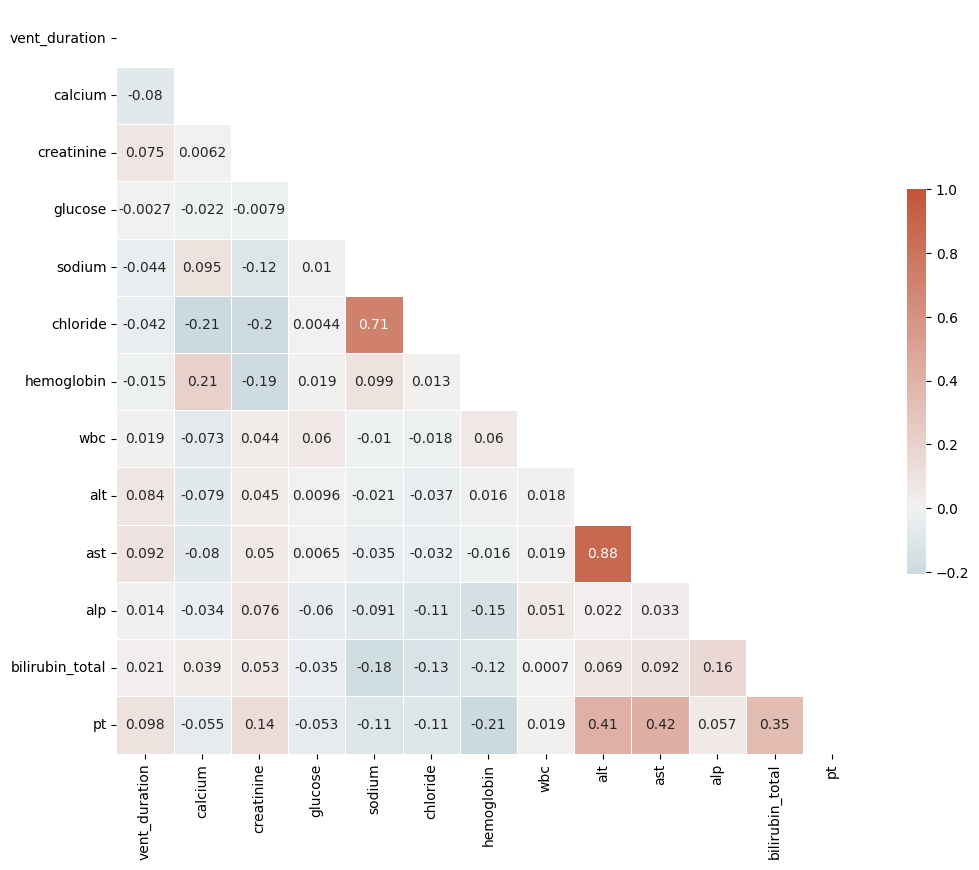

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
#Dropped icu_intime, vent_start and vent_end as they are usable for correlation
#Creating correlation matrix to observe the relationship between variables
df_corr = data.loc[:,'vent_duration':'pt'].corr()

#Setting up plots
f, ax = plt.subplots(figsize=(12,10))

#Setting up lower triangle correlation matrix
mask = np.triu(np.ones(df_corr.shape), k=0).astype(bool)
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


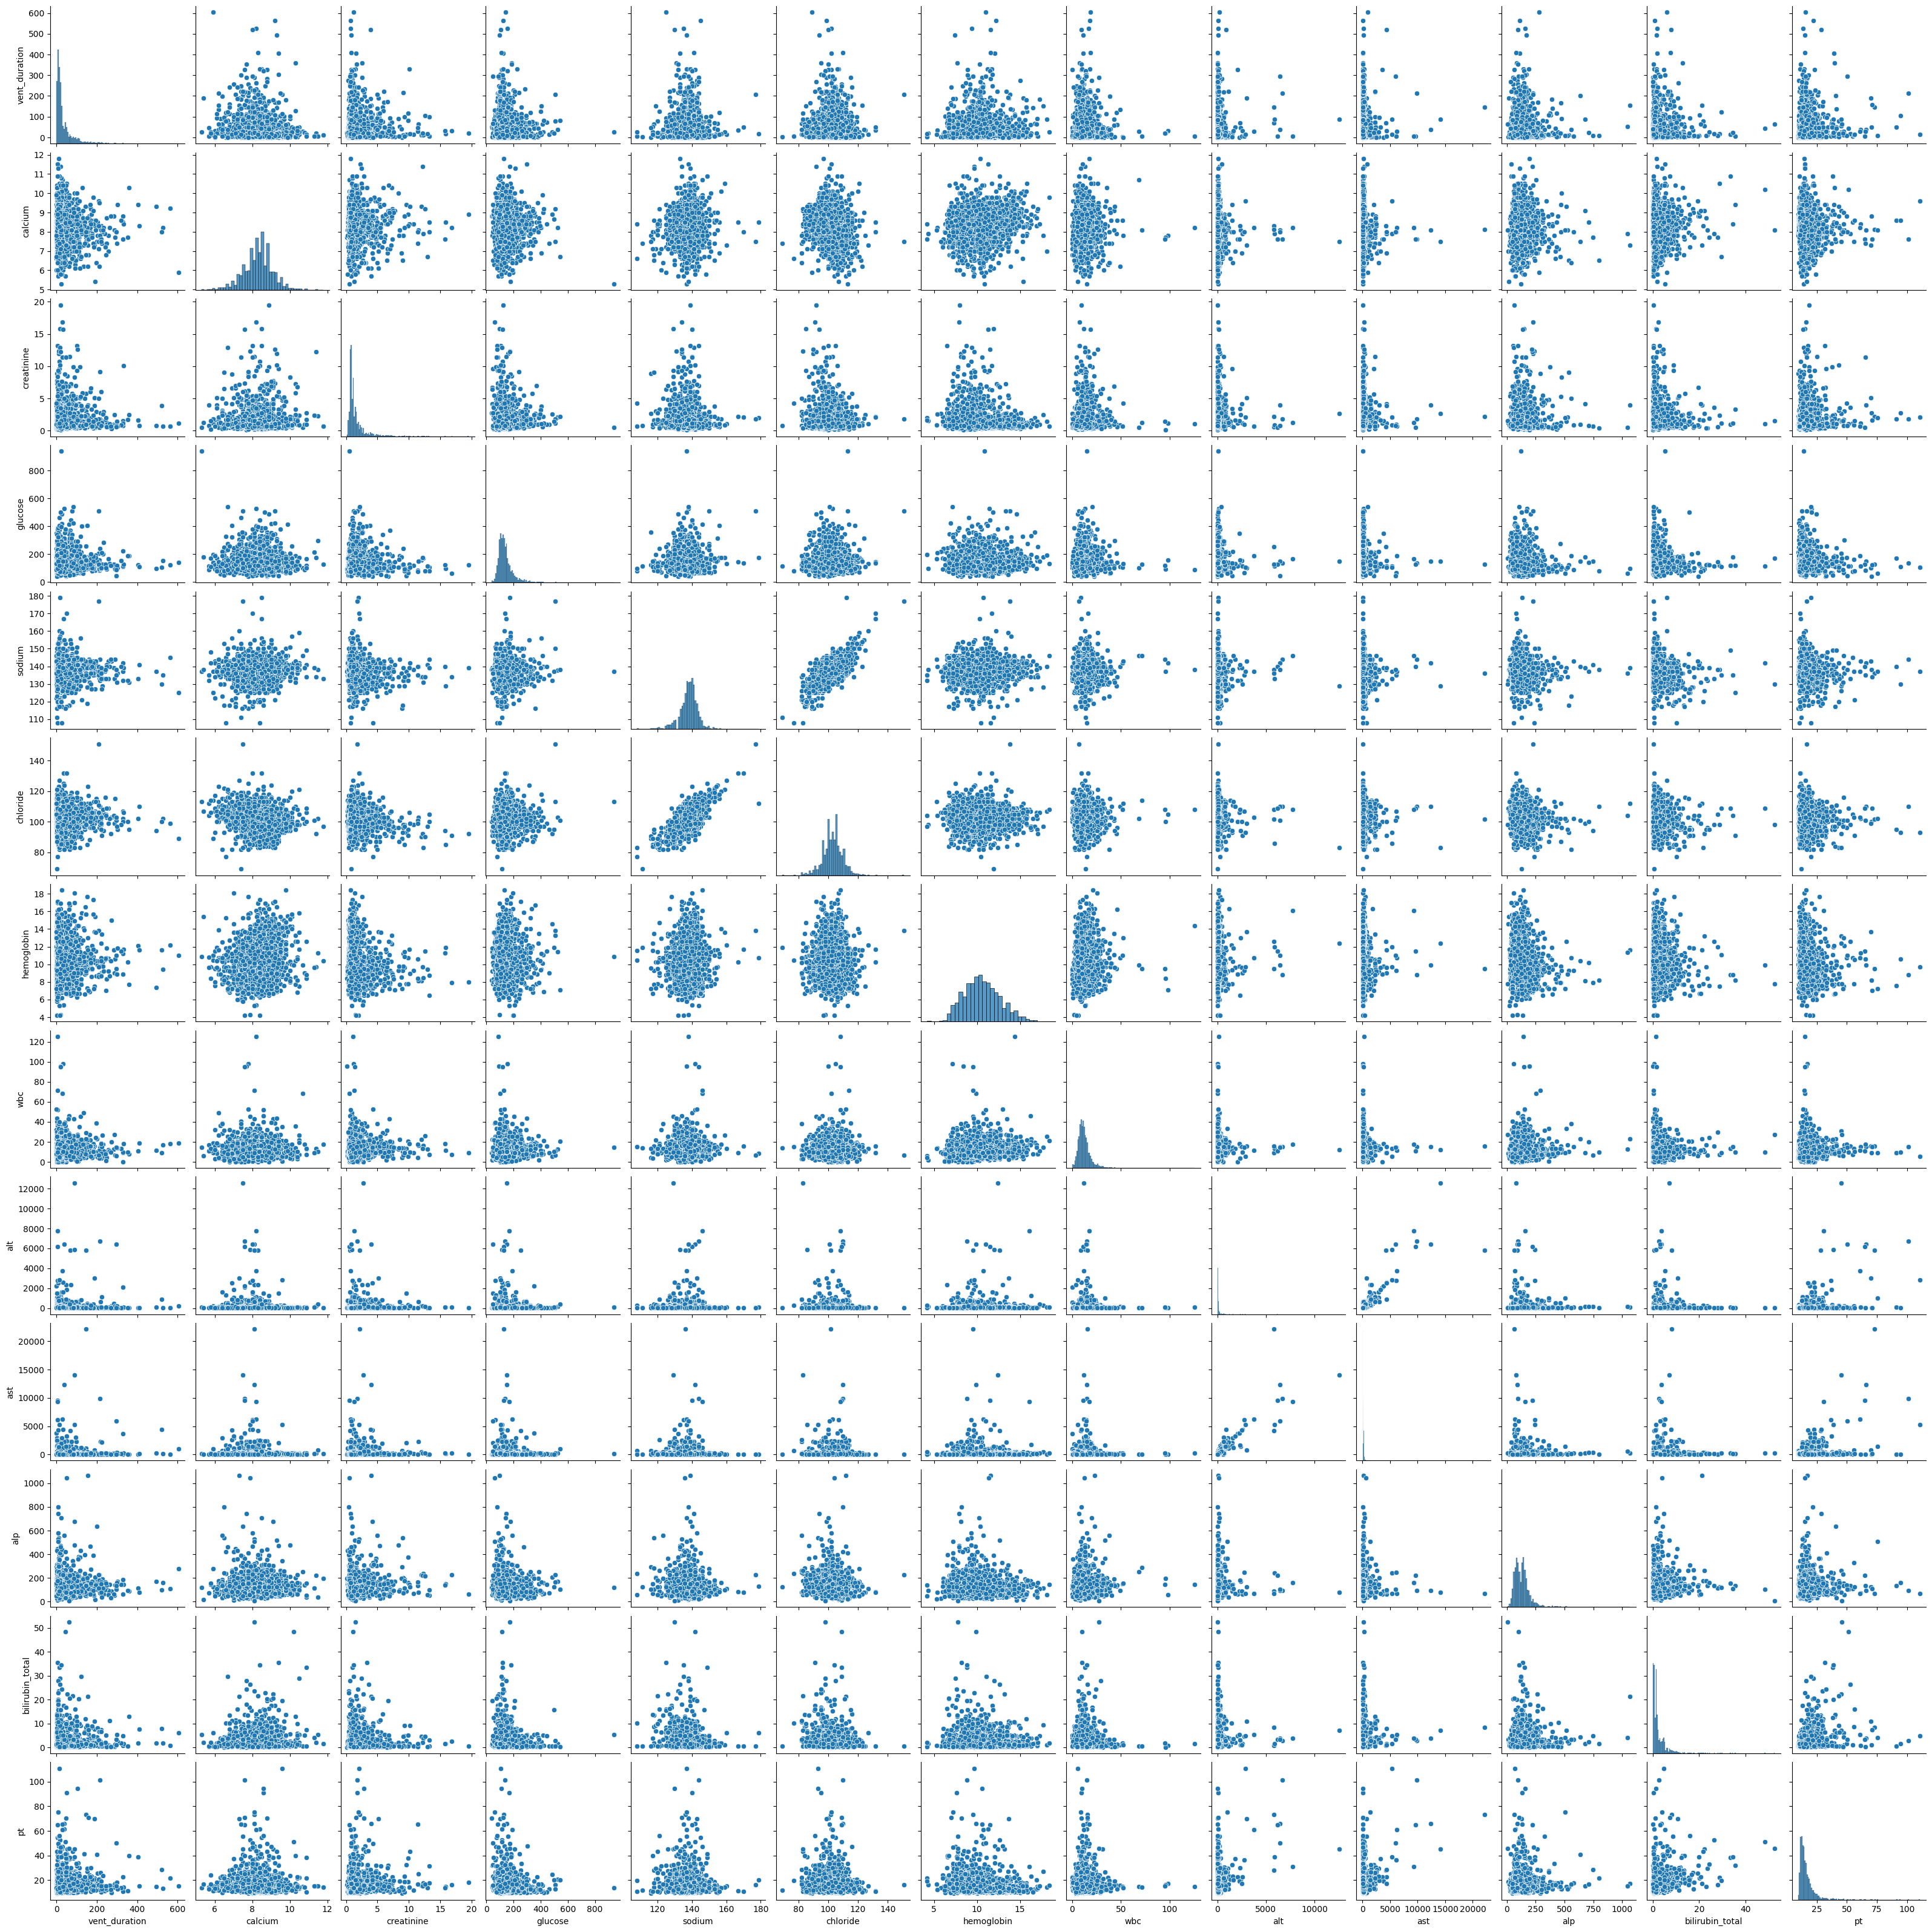

In [40]:
#Plotting pairplot to assess the relationship and distribution of each variable. 
sns.pairplot(data.loc[:,'vent_duration':'pt'])

Original Shape: (1923, 31)
Trimmed Shape: (1299, 31)


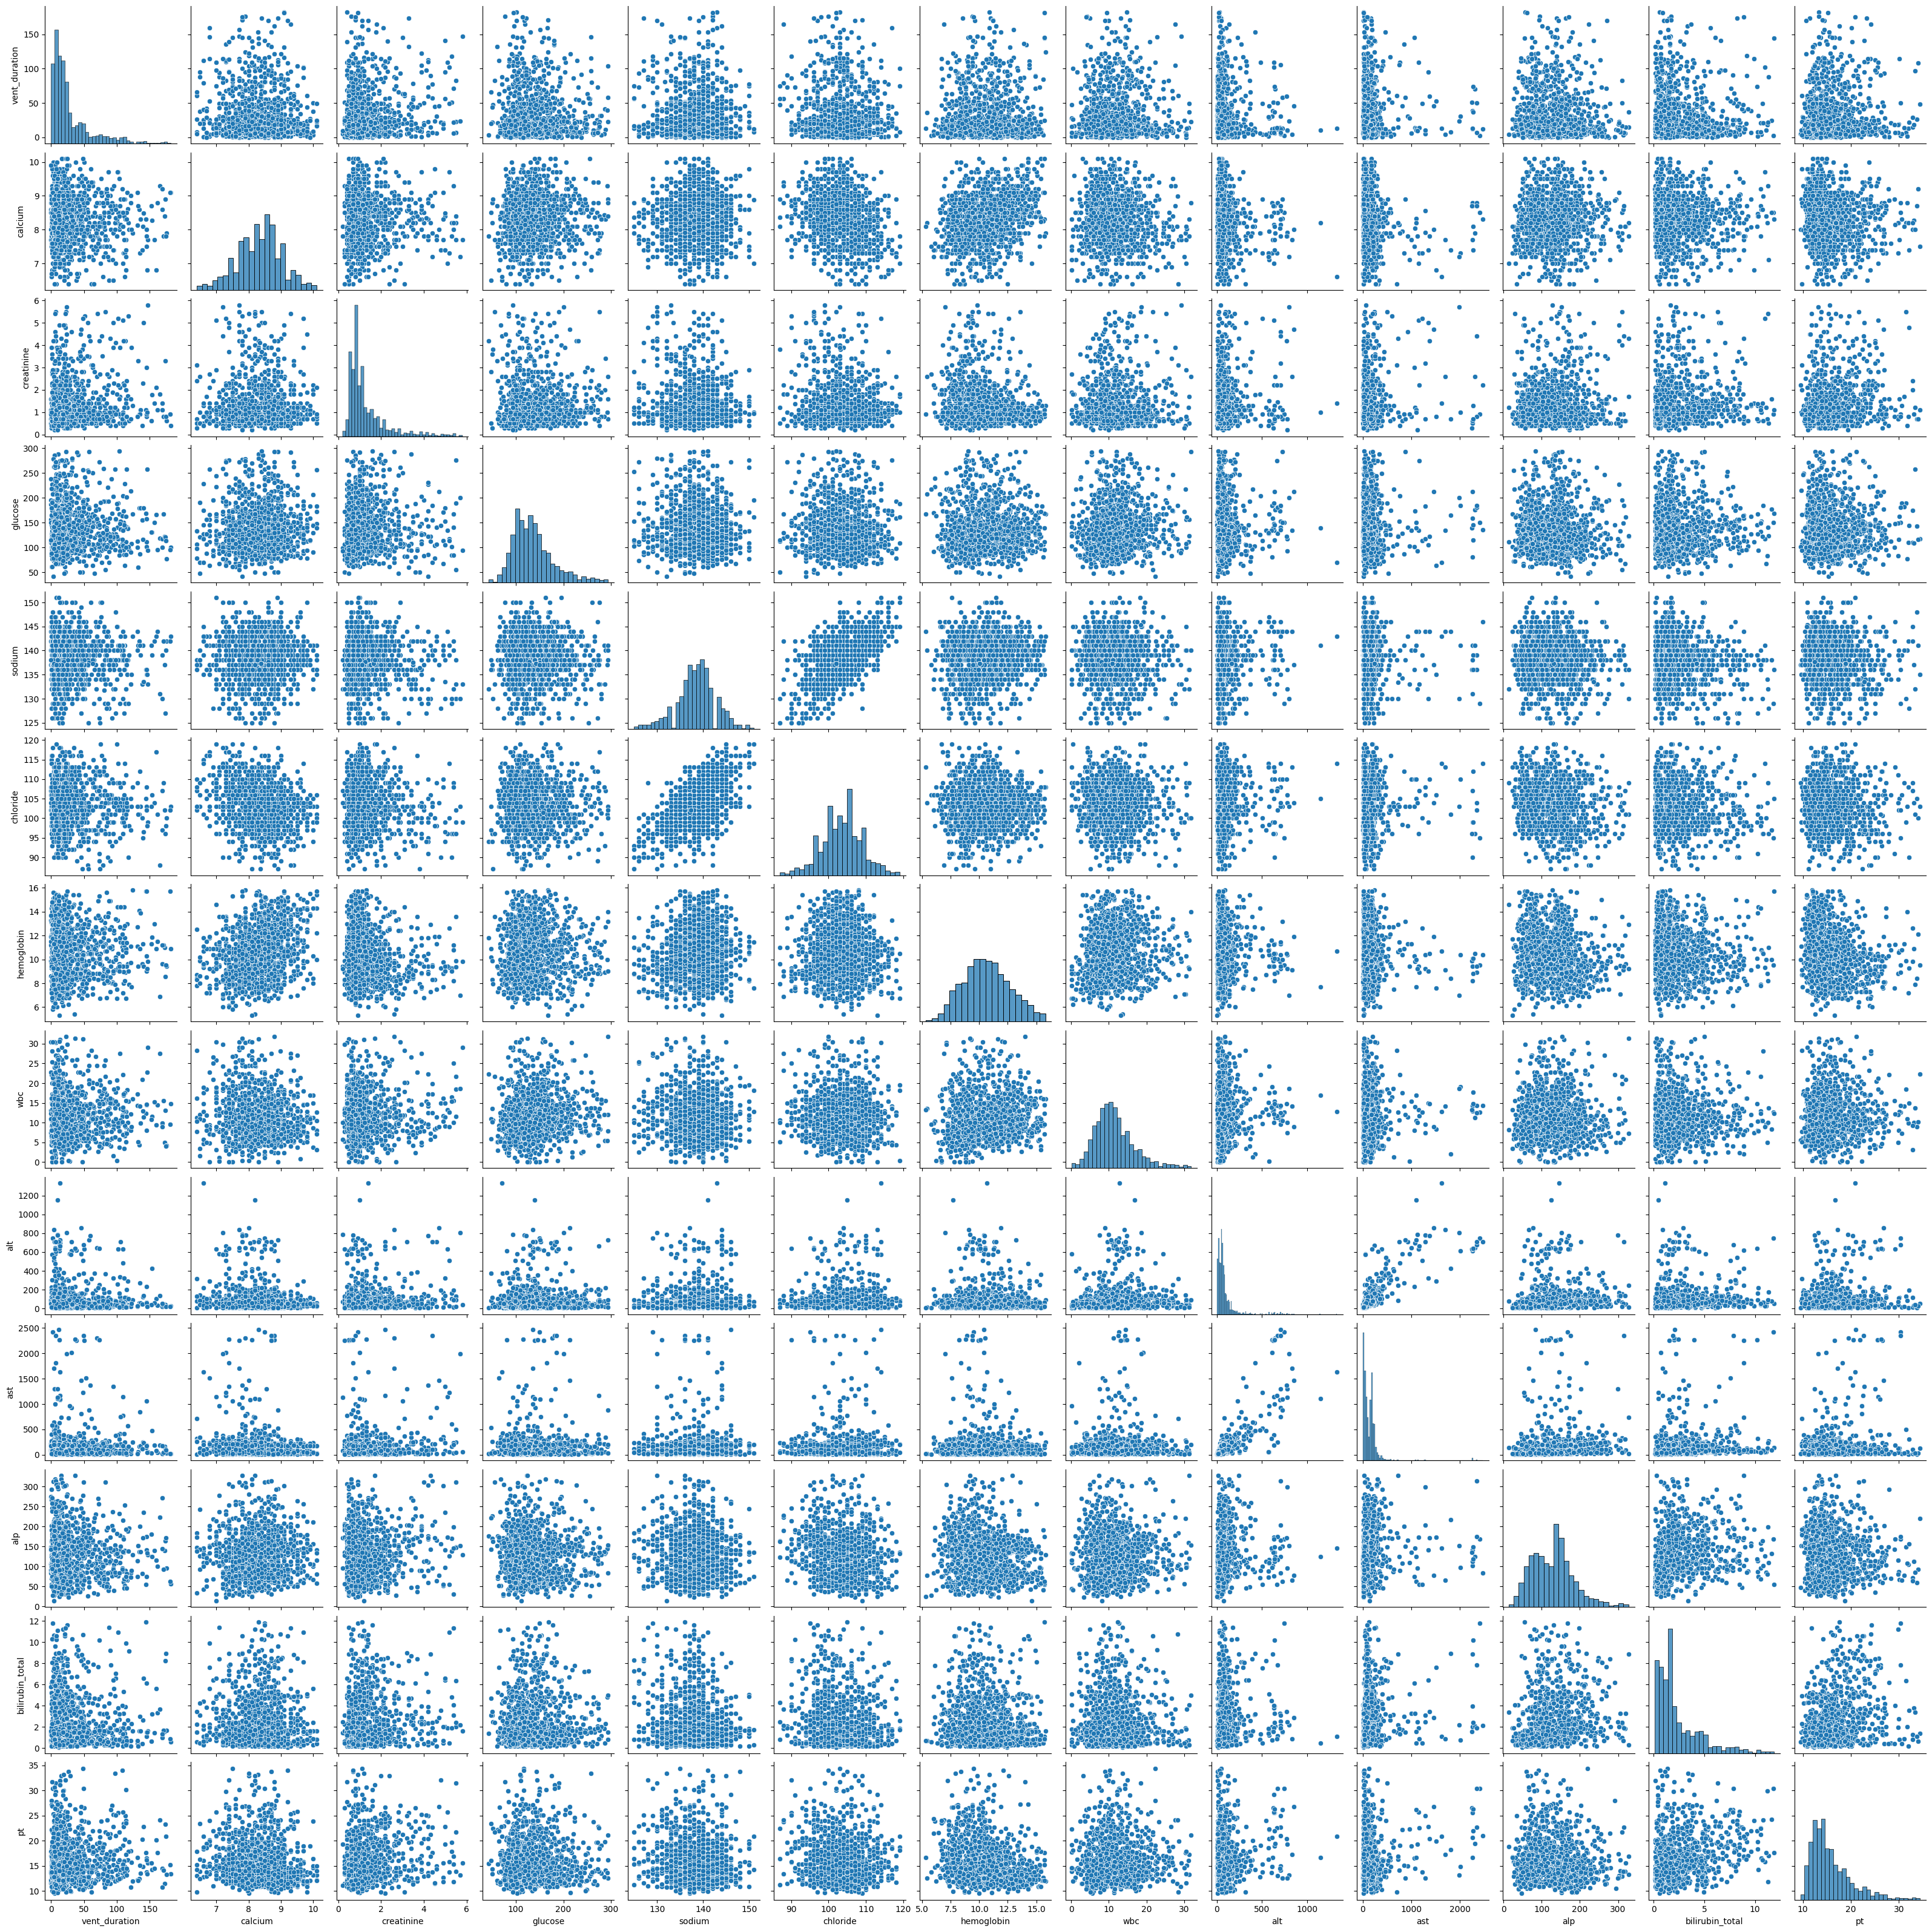

In [36]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()

# Scale the numeric columns using StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data[numeric_cols])

# Create a new dataframe with the scaled numeric columns
scaled_df = pd.DataFrame(scaled_df, columns=numeric_cols, index=data.index)

# Identify outliers with z-scores greater than 2.5 or less than -2.5 (95%)
z_scores = (scaled_df - scaled_df.mean()) / scaled_df.std()
outliers = data[(z_scores > 2.5).any(axis=1) | (z_scores < -2.5).any(axis=1)]

# Remove outliers from the original dataframe
trimmed_df = data.drop(outliers.index)

print("Original Shape:", data.shape)
print("Trimmed Shape:", trimmed_df.shape)
print(sns.pairplot(trimmed_df.loc[:,'vent_duration':'pt']))

<Axes: >

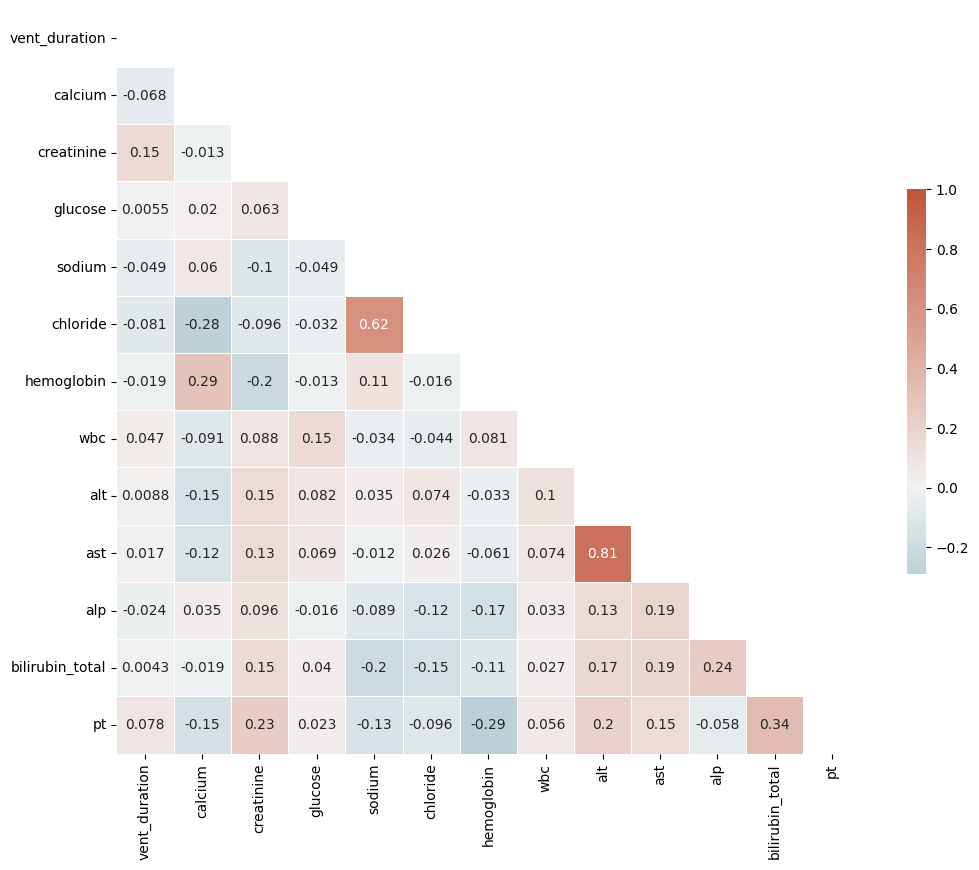

In [70]:
#Creating correlation matrix to observe the relationship between variables
trimmed_df_corr = trimmed_df.loc[:,'vent_duration':'pt'].corr()

#Setting up plots
f, ax = plt.subplots(figsize=(12,10))

#Setting up lower triangle correlation matrix
mask = np.triu(np.ones(trimmed_df_corr.shape), k=0).astype(bool)
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(trimmed_df_corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


In [37]:
trimmed_df['vent_duration_category'].value_counts()

12-24 hours      360
6-12 hours       270
24-48 hours      229
0-6 hours        195
over 72 hours    148
48-72 hours       97
Name: vent_duration_category, dtype: int64

In [38]:
trimmed_df

stay_id          icu_intime          vent_start            vent_end  \
0     30004144 2126-04-04 13:20:25 2026-04-05 16:00:00 2026-04-06 17:00:00   
2     30006983 2159-10-12 03:56:42 2059-10-12 18:00:00 2059-10-14 19:00:00   
3     30023204 2124-07-09 16:43:55 2024-07-11 16:00:00 2024-07-12 16:10:00   
4     30031418 2156-03-05 14:11:00 2056-03-07 22:06:00 2056-03-08 08:00:00   
5     30033048 2115-03-14 06:40:00 2015-03-16 16:00:00 2015-03-17 11:00:00   
...        ...                 ...                 ...                 ...   
1916  39969519 2116-10-07 04:40:03 2016-10-07 21:00:00 2016-10-08 20:00:00   
1917  39972274 2185-03-09 01:32:00 1985-03-09 16:51:00 1985-03-10 11:00:00   
1918  39977971 2115-12-11 17:42:45 2015-12-12 12:00:00 2015-12-12 16:00:00   
1919  39982332 2180-03-01 22:35:04 1980-03-02 19:00:00 1980-03-03 08:00:00   
1922  39992167 2114-06-10 19:00:00 2014-06-11 17:00:00 2014-06-15 05:00:00   

      vent_duration  calcium  creatinine  glucose  sodium  chloride  ...  \
0         25.000000     6.80         0.7    133.0   135.0     102.0  ...   
2         49.000000     7.10         1.0     89.0   136.0     108.0  ...   
3         24.166667     8.50         1.4    107.0   131.0     100.0  ...   
4          9.900000     7.40         0.4    133.0   139.0     106.0  ...   
5         19.000000     8.60         1.3    162.0   137.0     100.0  ...   
...             ...      ...         ...      ...     ...       ...  ...   
1916      23.000000     8.10         1.5    208.0   133.0      93.0  ...   
1917      18.150000     9.00         0.7     74.0   140.0     108.0  ...   
1918       4.000000     8.90         2.2     98.0   132.0      97.0  ...   
1919      13.000000     8.29         1.2    119.0   140.0     103.0  ...   
1922      84.000000     7.50         0.8    136.0   128.0     100.0  ...   

      sodium_grad  chloride_grad  hemoglobin_grad  wbc_grad  alt_grad  \
0        0.000000      -0.000077        -0.000093 -0.000023 -0.001937   
2        0.000073       0.000110         0.000001  0.000091  0.000055   
3       -0.000050      -0.000201         0.000076 -0.000222 -0.015952   
4        0.000000       0.000000         0.000000  0.000000  0.000000   
5        0.000000       0.000000         0.000000  0.000000  0.000000   
...           ...            ...              ...       ...       ...   
1916    -0.000150      -0.000150        -0.000010 -0.000140  0.000903   
1917     0.000000       0.000043         0.000009 -0.000032  0.000452   
1918     0.000100       0.000033        -0.000037 -0.000017  0.000825   
1919     0.000000       0.000000         0.000000  0.000000  0.000000   
1922    -0.000218       0.000000         0.000000 -0.000102 -0.006477   

      ast_grad  alp_grad  bilirubin_total_grad   pt_grad  \
0    -0.001798  0.001227              0.000031  0.000093   
2     0.000275 -0.000606              0.000004  0.000031   
3    -0.021621  0.003359              0.000101 -0.000434   
4     0.000000  0.000000              0.000000  0.000000   
5     0.000000  0.000000              0.000000  0.000000   
...        ...       ...                   ...       ...   
1916 -0.002370 -0.003157              0.000175  0.000315   
1917  0.002770  0.001108             -0.000003 -0.000081   
1918  0.000721 -0.000010              0.000001  0.000010   
1919  0.000000  0.000000              0.000000  0.000000   
1922 -0.007183 -0.005342              0.000131  0.000022   

      vent_duration_category  
0                24-48 hours  
2                48-72 hours  
3                24-48 hours  
4                 6-12 hours  
5                12-24 hours  
...                      ...  
1916             12-24 hours  
1917             12-24 hours  
1918               0-6 hours  
1919             12-24 hours  
1922           over 72 hours  

[1299 rows x 31 columns]

## **5. Modelling (Classification)**

In [39]:
from sklearn.model_selection import train_test_split

In [32]:
data

stay_id          icu_intime          vent_start            vent_end  \
0     30004144 2126-04-04 13:20:25 2026-04-05 16:00:00 2026-04-06 17:00:00   
1     30005366 2202-12-27 17:36:59 2002-12-28 14:00:00 2002-12-28 20:00:00   
2     30006983 2159-10-12 03:56:42 2059-10-12 18:00:00 2059-10-14 19:00:00   
3     30023204 2124-07-09 16:43:55 2024-07-11 16:00:00 2024-07-12 16:10:00   
4     30031418 2156-03-05 14:11:00 2056-03-07 22:06:00 2056-03-08 08:00:00   
...        ...                 ...                 ...                 ...   
1918  39977971 2115-12-11 17:42:45 2015-12-12 12:00:00 2015-12-12 16:00:00   
1919  39982332 2180-03-01 22:35:04 1980-03-02 19:00:00 1980-03-03 08:00:00   
1920  39985110 2141-03-03 05:57:46 2041-03-04 20:44:00 2041-03-06 04:00:00   
1921  39986206 2183-06-19 23:25:31 1983-06-20 22:00:00 1983-06-30 04:00:00   
1922  39992167 2114-06-10 19:00:00 2014-06-11 17:00:00 2014-06-15 05:00:00   

      vent_duration  calcium  creatinine  glucose  sodium  chloride  ...  \
0         25.000000     6.80         0.7    133.0   135.0     102.0  ...   
1          6.000000     8.80         6.7     41.0   139.0     100.0  ...   
2         49.000000     7.10         1.0     89.0   136.0     108.0  ...   
3         24.166667     8.50         1.4    107.0   131.0     100.0  ...   
4          9.900000     7.40         0.4    133.0   139.0     106.0  ...   
...             ...      ...         ...      ...     ...       ...  ...   
1918       4.000000     8.90         2.2     98.0   132.0      97.0  ...   
1919      13.000000     8.29         1.2    119.0   140.0     103.0  ...   
1920      31.266667    10.40         6.8    149.0   139.0      98.0  ...   
1921     222.000000     7.50         6.0    101.0   139.0     103.0  ...   
1922      84.000000     7.50         0.8    136.0   128.0     100.0  ...   

      sodium_grad  chloride_grad  hemoglobin_grad  wbc_grad  alt_grad  \
0        0.000000      -0.000077        -0.000093 -0.000023 -0.001937   
1        0.000000       0.000000         0.000000  0.000000  0.000000   
2        0.000073       0.000110         0.000001  0.000091  0.000055   
3       -0.000050      -0.000201         0.000076 -0.000222 -0.015952   
4        0.000000       0.000000         0.000000  0.000000  0.000000   
...           ...            ...              ...       ...       ...   
1918     0.000100       0.000033        -0.000037 -0.000017  0.000825   
1919     0.000000       0.000000         0.000000  0.000000  0.000000   
1920     0.000018       0.000000         0.000007  0.000052 -0.001013   
1921     0.000000       0.000000         0.000017 -0.000039  0.004745   
1922    -0.000218       0.000000         0.000000 -0.000102 -0.006477   

      ast_grad  alp_grad  bilirubin_total_grad   pt_grad  \
0    -0.001798  0.001227              0.000031  0.000093   
1     0.000000  0.000000              0.000000  0.000000   
2     0.000275 -0.000606              0.000004  0.000031   
3    -0.021621  0.003359              0.000101 -0.000434   
4     0.000000  0.000000              0.000000  0.000000   
...        ...       ...                   ...       ...   
1918  0.000721 -0.000010              0.000001  0.000010   
1919  0.000000  0.000000              0.000000  0.000000   
1920 -0.003093 -0.000708              0.000059  0.000028   
1921  0.007000  0.003632              0.000045  0.000013   
1922 -0.007183 -0.005342              0.000131  0.000022   

      vent_duration_category  
0                24-42 hours  
1                  0-6 hours  
2                42-72 hours  
3                24-42 hours  
4                 6-12 hours  
...                      ...  
1918               0-6 hours  
1919             12-18 hours  
1920             24-42 hours  
1921           over 72 hours  
1922           over 72 hours  

[1923 rows x 31 columns]

In [40]:
X = data.drop(['stay_id','icu_intime','vent_start','vent_end','vent_duration','vent_duration_category'],axis = 1)
y = data['vent_duration_category']
scaler2 = StandardScaler()
X_scaled = scaler2.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=66)

In [41]:
y_train.value_counts()

12-24 hours      357
6-12 hours       262
24-48 hours      234
over 72 hours    205
0-6 hours        181
48-72 hours      107
Name: vent_duration_category, dtype: int64

In [81]:
%pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 8.9 MB/s eta 0:00:00
--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/seg

In [42]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [43]:
y_train.value_counts()

0-6 hours        357
6-12 hours       357
12-24 hours      357
24-48 hours      357
48-72 hours      357
over 72 hours    357
Name: vent_duration_category, dtype: int64

In [57]:
%pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 8.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 8.9 MB/s eta 0:00:0000:0100:01
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 1

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report,f1_score,make_scorer

In [45]:
X_train.shape,y_train.shape

((2142, 25), (2142,))

In [46]:
lr = LogisticRegression(random_state = 66, class_weight= 'balanced', multi_class='multinomial')
lr_model = lr.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)
print('Logistic Regression')
print(classification_report(y_test,y_pred))

Logistic Regression
               precision    recall  f1-score   support

    0-6 hours       0.17      0.26      0.21        91
  12-24 hours       0.27      0.13      0.18       151
  24-48 hours       0.22      0.21      0.21       108
  48-72 hours       0.07      0.15      0.09        48
   6-12 hours       0.24      0.30      0.26        90
over 72 hours       0.27      0.11      0.16        89

     accuracy                           0.19       577
    macro avg       0.21      0.19      0.19       577
 weighted avg       0.22      0.19      0.19       577



In [47]:
f1_scorer = make_scorer(f1_score, average='macro')
params = {'C': [0.01, 0.1, 1, 10],
           'max_iter': [40,150,100]}
lr = LogisticRegression(random_state = 66, class_weight= 'balanced', multi_class='multinomial',solver='newton-cg')
grid_search = GridSearchCV(lr, param_grid=params, cv=5,scoring = f1_scorer)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1, 'max_iter': 40}
0.22254998362007505


In [48]:
y_pred = grid_search.predict(X_test)
print('Logistic Regression')
print(classification_report(y_test,y_pred))

Logistic Regression
               precision    recall  f1-score   support

    0-6 hours       0.17      0.26      0.21        91
  12-24 hours       0.27      0.13      0.18       151
  24-48 hours       0.22      0.21      0.21       108
  48-72 hours       0.07      0.15      0.09        48
   6-12 hours       0.24      0.30      0.26        90
over 72 hours       0.27      0.11      0.16        89

     accuracy                           0.19       577
    macro avg       0.21      0.19      0.19       577
 weighted avg       0.22      0.19      0.19       577



In [49]:
dtc = DecisionTreeClassifier(random_state = 66, class_weight= 'balanced')
dtc_model = dtc.fit(X_train,y_train)
y_pred = dtc_model.predict(X_test)
print('Decision Tree')
print(classification_report(y_test,y_pred))

Decision Tree
               precision    recall  f1-score   support

    0-6 hours       0.14      0.12      0.13        91
  12-24 hours       0.21      0.20      0.20       151
  24-48 hours       0.23      0.23      0.23       108
  48-72 hours       0.02      0.02      0.02        48
   6-12 hours       0.18      0.22      0.20        90
over 72 hours       0.14      0.15      0.14        89

     accuracy                           0.17       577
    macro avg       0.15      0.16      0.16       577
 weighted avg       0.17      0.17      0.17       577



In [50]:
dtc = DecisionTreeClassifier(random_state = 66, class_weight= 'balanced')
params = {'max_depth': [5, 10, 15, 20, 25, 30, 35, 40],
           'min_samples_split': [2, 5, 10, 15, 20]}
grid_search = GridSearchCV(dtc, param_grid=params, cv=5,scoring=f1_scorer)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
y_pred = grid_search.predict(X_test)
print('Decision Tree')
print(classification_report(y_test,y_pred))

{'max_depth': 35, 'min_samples_split': 2}
0.6378919861211927
Decision Tree
               precision    recall  f1-score   support

    0-6 hours       0.14      0.12      0.13        91
  12-24 hours       0.21      0.20      0.20       151
  24-48 hours       0.23      0.23      0.23       108
  48-72 hours       0.02      0.02      0.02        48
   6-12 hours       0.18      0.22      0.20        90
over 72 hours       0.14      0.15      0.14        89

     accuracy                           0.17       577
    macro avg       0.15      0.16      0.16       577
 weighted avg       0.17      0.17      0.17       577



In [51]:
rfc = RandomForestClassifier(random_state = 66, class_weight= 'balanced')
rfc_model = rfc.fit(X_train,y_train)
y_pred = rfc_model.predict(X_test)
print('Random Forest')
print(classification_report(y_test,y_pred))

Random Forest
               precision    recall  f1-score   support

    0-6 hours       0.20      0.11      0.14        91
  12-24 hours       0.26      0.40      0.31       151
  24-48 hours       0.22      0.19      0.21       108
  48-72 hours       0.04      0.02      0.03        48
   6-12 hours       0.18      0.22      0.20        90
over 72 hours       0.25      0.16      0.19        89

     accuracy                           0.22       577
    macro avg       0.19      0.18      0.18       577
 weighted avg       0.21      0.22      0.21       577



In [52]:
rfc = RandomForestClassifier(random_state = 66, class_weight= 'balanced')
params = {'n_estimators': [50, 100, 200],
          'max_depth': [5, 10, None], 
          'min_samples_split': [2, 5, 10], 
          'min_samples_leaf': [1, 2, 4, 8]
          }
grid_search = GridSearchCV(rfc, param_grid=params, cv=5,scoring = f1_scorer)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)


{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
0.6711544675865396


In [53]:
y_pred = grid_search.predict(X_test)
print('Random Forest')
print(classification_report(y_test,y_pred))

Random Forest
               precision    recall  f1-score   support

    0-6 hours       0.10      0.04      0.06        91
  12-24 hours       0.26      0.37      0.31       151
  24-48 hours       0.20      0.19      0.20       108
  48-72 hours       0.07      0.04      0.05        48
   6-12 hours       0.16      0.22      0.19        90
over 72 hours       0.18      0.13      0.15        89

     accuracy                           0.20       577
    macro avg       0.16      0.17      0.16       577
 weighted avg       0.18      0.20      0.18       577



In [54]:
gbc = GradientBoostingClassifier(random_state = 66)
gbc_model = gbc.fit(X_train,y_train)
y_pred = gbc_model.predict(X_test)
print('Gradient Boosting')
print(classification_report(y_test,y_pred))

Gradient Boosting
               precision    recall  f1-score   support

    0-6 hours       0.13      0.11      0.12        91
  12-24 hours       0.26      0.28      0.27       151
  24-48 hours       0.20      0.15      0.17       108
  48-72 hours       0.05      0.06      0.06        48
   6-12 hours       0.18      0.21      0.19        90
over 72 hours       0.21      0.21      0.21        89

     accuracy                           0.19       577
    macro avg       0.17      0.17      0.17       577
 weighted avg       0.19      0.19      0.19       577



In [144]:
gbc = GradientBoostingClassifier(random_state = 66,n_estimators=300,learning_rate=0.1,max_depth=4)
params = {#'n_estimators': [50, 100, 200, 300], 
          #'learning_rate': [0.01, 0.05, 0.1, 0.2], 
          #'max_depth': [3, 4, 5, 7], 
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 5]
          }
grid_search = GridSearchCV(gbc, param_grid=params, cv=5,scoring = f1_scorer)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 4}
0.14544576911905036


In [146]:
y_pred = grid_search.predict(X_test)
print('Graident Boost')
print(classification_report(y_test,y_pred))

Graident Boost
               precision    recall  f1-score   support

    0-6 hours       0.17      0.13      0.15        91
  12-18 hours       0.12      0.11      0.12        88
  18-24 hours       0.16      0.14      0.15        63
  24-42 hours       0.13      0.13      0.13        76
  42-72 hours       0.13      0.10      0.11        80
   6-12 hours       0.15      0.24      0.18        90
over 72 hours       0.24      0.21      0.22        89

     accuracy                           0.16       577
    macro avg       0.16      0.15      0.15       577
 weighted avg       0.16      0.16      0.15       577



In [55]:
etc = ExtraTreesClassifier(random_state = 66,class_weight='balanced')
etc_model = etc.fit(X_train,y_train)
y_pred = etc_model.predict(X_test)
print('Extra Tree')
print(classification_report(y_test,y_pred))

Extra Tree
               precision    recall  f1-score   support

    0-6 hours       0.16      0.07      0.09        91
  12-24 hours       0.26      0.54      0.35       151
  24-48 hours       0.19      0.12      0.15       108
  48-72 hours       0.00      0.00      0.00        48
   6-12 hours       0.18      0.21      0.19        90
over 72 hours       0.20      0.10      0.14        89

     accuracy                           0.22       577
    macro avg       0.16      0.17      0.15       577
 weighted avg       0.19      0.22      0.19       577



In [64]:
etc = ExtraTreesClassifier(random_state = 66,class_weight='balanced',max_features='log2',n_estimators=200)
params = {#'n_estimators': [50, 100, 200, 300],
          #'max_features': [None, 'sqrt', 'log2'], 
          'max_depth': [3,  5,  7], 
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 5]
          }
grid_search = GridSearchCV(etc, param_grid=params, cv=5,scoring=f1_scorer )
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.4145965880366992


In [65]:
y_pred = grid_search.predict(X_test)
print('Extra Trees')
print(classification_report(y_test,y_pred))

Extra Trees
               precision    recall  f1-score   support

    0-6 hours       0.13      0.21      0.16        91
  12-24 hours       0.27      0.17      0.21       151
  24-48 hours       0.19      0.12      0.15       108
  48-72 hours       0.07      0.12      0.09        48
   6-12 hours       0.20      0.31      0.24        90
over 72 hours       0.28      0.15      0.19        89

     accuracy                           0.18       577
    macro avg       0.19      0.18      0.17       577
 weighted avg       0.21      0.18      0.18       577



Selected Model For Classification (SVM + bins 2)

In [56]:
svm = SVC(random_state = 66,class_weight='balanced')
svm_model = svm.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
print('SVM')
print(classification_report(y_test,y_pred))

SVM
               precision    recall  f1-score   support

    0-6 hours       0.12      0.23      0.16        91
  12-24 hours       0.23      0.16      0.19       151
  24-48 hours       0.22      0.18      0.19       108
  48-72 hours       0.11      0.19      0.14        48
   6-12 hours       0.24      0.22      0.23        90
over 72 hours       0.41      0.21      0.28        89

     accuracy                           0.19       577
    macro avg       0.22      0.20      0.20       577
 weighted avg       0.23      0.19      0.20       577



In [80]:
svc = SVC(random_state = 66,class_weight='balanced',kernel = 'rbf')
params = {'C': [ 0.1, 1, 10, 100],
          #'kernel': ['linear', 'poly', 'rbf'],
          #'gamma': [10,20,30], 
          'degree': [2, 3, 4, 5], 
          'coef0': [-1, 0, 1]
          }
grid_search = GridSearchCV(svc, param_grid=params, cv=5, scoring=f1_scorer)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 100, 'coef0': -1, 'degree': 2}
0.5038014607748714


In [81]:
y_pred = grid_search.predict(X_test)
print('SVM')
print(classification_report(y_test,y_pred))

SVM
               precision    recall  f1-score   support

    0-6 hours       0.15      0.24      0.18        91
  12-24 hours       0.26      0.21      0.23       151
  24-48 hours       0.26      0.22      0.24       108
  48-72 hours       0.04      0.04      0.04        48
   6-12 hours       0.19      0.20      0.20        90
over 72 hours       0.24      0.17      0.20        89

     accuracy                           0.20       577
    macro avg       0.19      0.18      0.18       577
 weighted avg       0.21      0.20      0.20       577



In [57]:
cbc = CatBoostClassifier(random_state = 66)
cbc_model = cbc.fit(X_train,y_train)
y_pred = cbc_model.predict(X_test)
print('Catboost')
print(classification_report(y_test,y_pred))

Learning rate set to 0.082261
0:	learn: 1.7781747	total: 68.2ms	remaining: 1m 8s
1:	learn: 1.7665717	total: 72.9ms	remaining: 36.4s
2:	learn: 1.7604664	total: 76.9ms	remaining: 25.6s
3:	learn: 1.7512586	total: 81.7ms	remaining: 20.3s
4:	learn: 1.7469835	total: 85.9ms	remaining: 17.1s
5:	learn: 1.7313307	total: 90.1ms	remaining: 14.9s
6:	learn: 1.7208093	total: 94.1ms	remaining: 13.4s
7:	learn: 1.7160135	total: 98.7ms	remaining: 12.2s
8:	learn: 1.7076463	total: 103ms	remaining: 11.4s
9:	learn: 1.6941645	total: 107ms	remaining: 10.6s
10:	learn: 1.6869873	total: 111ms	remaining: 9.99s
11:	learn: 1.6767269	total: 116ms	remaining: 9.52s
12:	learn: 1.6664289	total: 120ms	remaining: 9.09s
13:	learn: 1.6588497	total: 124ms	remaining: 8.71s
14:	learn: 1.6498602	total: 128ms	remaining: 8.4s
15:	learn: 1.6423425	total: 132ms	remaining: 8.13s
16:	learn: 1.6361110	total: 137ms	remaining: 7.89s
17:	learn: 1.6240209	total: 141ms	remaining: 7.68s
18:	learn: 1.6167856	total: 145ms	remaining: 7.51s
19:	

In [58]:
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

    0-6 hours       0.18      0.09      0.12        91
  12-24 hours       0.27      0.38      0.31       151
  24-48 hours       0.21      0.19      0.20       108
  48-72 hours       0.05      0.02      0.03        48
   6-12 hours       0.16      0.22      0.19        90
over 72 hours       0.18      0.15      0.16        89

     accuracy                           0.21       577
    macro avg       0.18      0.18      0.17       577
 weighted avg       0.20      0.21      0.20       577



In [ ]:
catboost = CatBoostClassifier(iterations=500,depth=12,learning_rate= 0.1)
params = {'learning_rate': [0.1,0.2],
          'depth': [9,12],
          #'iterations': [100, 500, 1000], 
          #'l2_leaf_reg': [1, 3, 5, 7],
          #'random_strength': [0.1, 0.5, 1, 5]
          }
grid_search = GridSearchCV(catboost, param_grid=params, cv=5,scoring=f1_scorer)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

In [91]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'depth': 12, 'learning_rate': 0.1}
0.6796089567851091


In [90]:
y_pred = grid_search.predict(X_test)
print('CatBoost')
print(classification_report(y_test,y_pred))

CatBoost
               precision    recall  f1-score   support

    0-6 hours       0.19      0.09      0.12        91
  12-24 hours       0.29      0.53      0.37       151
  24-48 hours       0.23      0.17      0.19       108
  48-72 hours       0.11      0.02      0.04        48
   6-12 hours       0.16      0.18      0.17        90
over 72 hours       0.22      0.17      0.19        89

     accuracy                           0.24       577
    macro avg       0.20      0.19      0.18       577
 weighted avg       0.22      0.24      0.21       577



## **6. Modelling (Regression)**

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [94]:
X = trimmed_df.drop(['stay_id','icu_intime','vent_start','vent_end','vent_duration','vent_duration_category'],axis = 1)
y = trimmed_df['vent_duration']
scaler2 = StandardScaler()
X_scaled = scaler2.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=66)

In [286]:
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print('Linear Regression')
print("r2:", r2_score(y_test,y_pred))
print("rmse:", np.sqrt(mean_absolute_error(y_test,y_pred)))
print("mse:", mean_absolute_error(y_test,y_pred))
print("mae:", mean_absolute_error(y_test,y_pred))

Linear Regression
r2: -0.0265155726792754
rmse: 4.854307265725953
mse: 23.564299030079773
mae: 23.564299030079773


In [96]:
import matplotlib.pyplot as plt

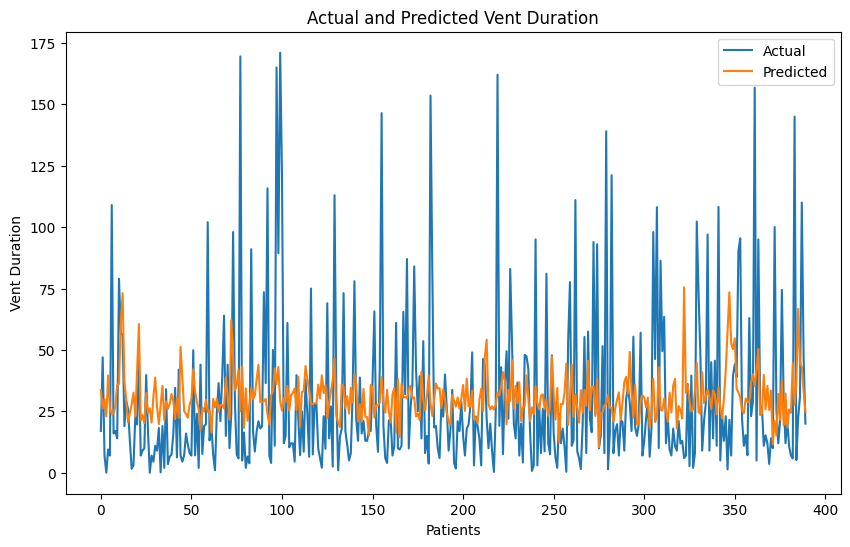

In [287]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual and Predicted Vent Duration')
plt.xlabel('Patients')
plt.ylabel('Vent Duration')
plt.legend()
plt.show()

In [288]:
rd = Ridge(random_state=66)
rd_model = rd.fit(X_train, y_train)
y_pred = rd_model.predict(X_test)
print('Ridge')
print("r2:", r2_score(y_test,y_pred))
print("rmse:", np.sqrt(mean_absolute_error(y_test,y_pred)))
print("mse:", mean_absolute_error(y_test,y_pred))
print("mae:", mean_absolute_error(y_test,y_pred))

Ridge
r2: -0.026105509914359226
rmse: 4.853886558241132
mse: 23.560214720273937
mae: 23.560214720273937


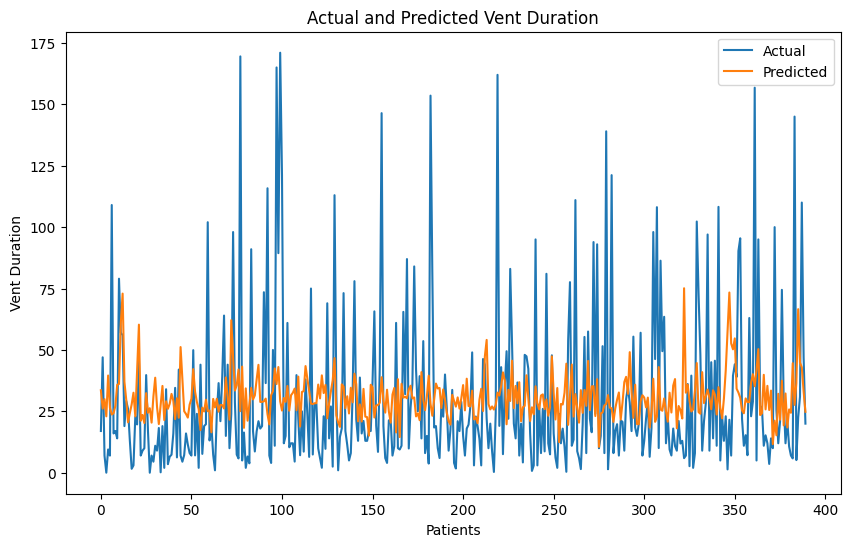

In [289]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual and Predicted Vent Duration')
plt.xlabel('Patients')
plt.ylabel('Vent Duration')
plt.legend()
plt.show()

In [224]:
rmse_scorer = make_scorer(mean_squared_error, squared=False)
ridge = Ridge(random_state=66)
param_grid = {'alpha': [ 0.1,0.01,0.05]}
grid_search = GridSearchCV(ridge, param_grid=param_grid, scoring=rmse_scorer, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 0.01}
32.912999481722935


In [290]:
y_pred = grid_search.predict(X_test)
print('Ridge')
print("r2:", r2_score(y_test,y_pred))
print("rmse:", np.sqrt(mean_absolute_error(y_test,y_pred)))
print("mse:", mean_absolute_error(y_test,y_pred))
print("mae:", mean_absolute_error(y_test,y_pred))

Ridge
r2: -0.30708846383469846
rmse: 5.166742807391063
mse: 26.695231237727278
mae: 26.695231237727278


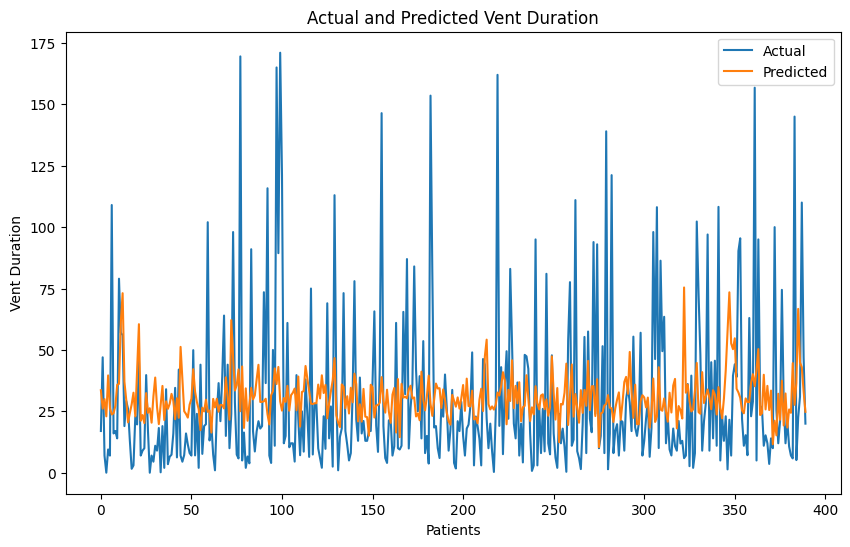

In [118]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual and Predicted Vent Duration')
plt.xlabel('Patients')
plt.ylabel('Vent Duration')
plt.legend()
plt.show()

In [291]:
etr = ExtraTreesRegressor(random_state= 66)
etr_model = etr.fit(X_train, y_train)
y_pred = etr_model.predict(X_test)
print('ExtraTreesRegressor')
print("r2:", r2_score(y_test,y_pred))
print("rmse:", np.sqrt(mean_absolute_error(y_test,y_pred)))
print("mse:", mean_absolute_error(y_test,y_pred))
print("mae:", mean_absolute_error(y_test,y_pred))

ExtraTreesRegressor
r2: -0.062084339746237394
rmse: 4.962925669078389
mse: 24.630631196797175
mae: 24.630631196797175


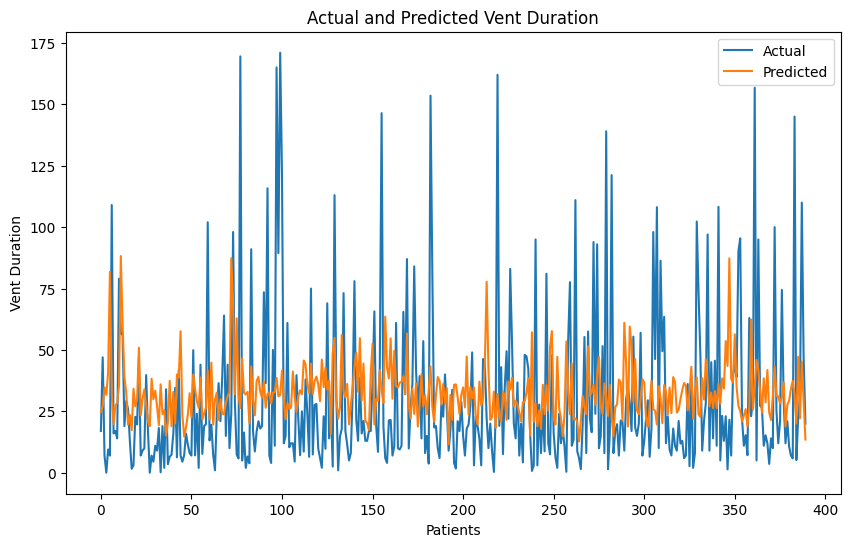

In [120]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual and Predicted Vent Duration')
plt.xlabel('Patients')
plt.ylabel('Vent Duration')
plt.legend()
plt.show()

In [232]:
rmse_scorer = make_scorer(mean_squared_error, squared=False)
etr = ExtraTreesRegressor(random_state=66,n_estimators=50)
param_grid = {#'n_estimators': [50,100,150],
              #'max_depth': [5, 10,None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              }
grid_search = GridSearchCV(etr, param_grid=param_grid, scoring=rmse_scorer, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'min_samples_leaf': 1, 'min_samples_split': 2}
33.32565771710017


Extra Tree
r2: -6.958436403447811
rmse: 4.962951458519432
mse: 24.630887179620157
mae: 24.630887179620157


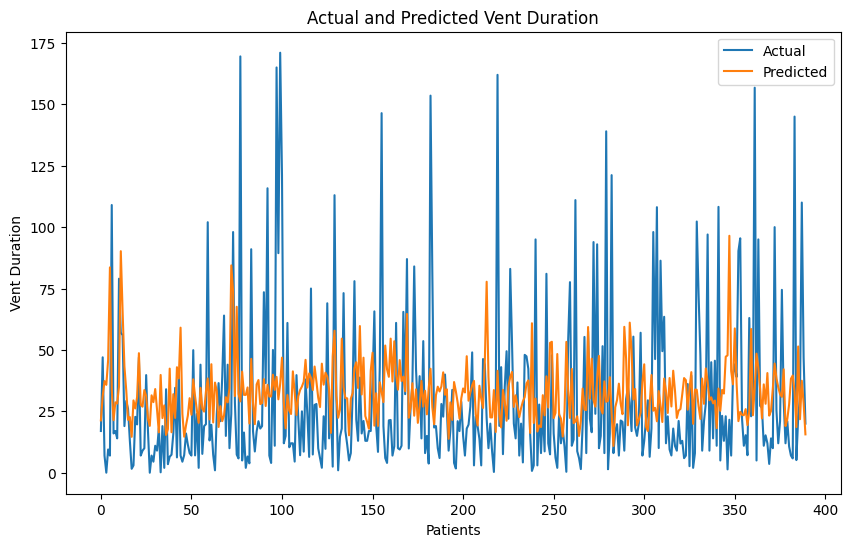

In [233]:
y_pred = grid_search.predict(X_test)
print('Extra Tree')
print("r2:", r2_score(y_pred,y_test))
print("rmse:", np.sqrt(mean_absolute_error(y_pred,y_test)))
print("mse:", mean_absolute_error(y_pred,y_test))
print("mae:", mean_absolute_error(y_pred,y_test))
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual and Predicted Vent Duration')
plt.xlabel('Patients')
plt.ylabel('Vent Duration')
plt.legend()
plt.show()

In [264]:
gbr = GradientBoostingRegressor(random_state= 66)
gbr_model = gbr.fit(X_train, y_train)
y_pred = gbr_model.predict(X_test)
print('GradientBoostingRegressor')
print("r2:", r2_score(y_test,y_pred))
print("rmse:", np.sqrt(mean_absolute_error(y_test,y_pred)))
print("mse:", mean_absolute_error(y_test,y_pred))
print("mae:", mean_absolute_error(y_test,y_pred))


GradientBoostingRegressor
r2: -7.0407263876592925
rmse: 4.832760647546575
mse: 23.355575476474787
mae: 23.355575476474787


GradientBoostingRegressor
r2: -0.7019838318050278
rmse: 5.398182360613679
mse: 29.140372798440666
mae: 29.140372798440666


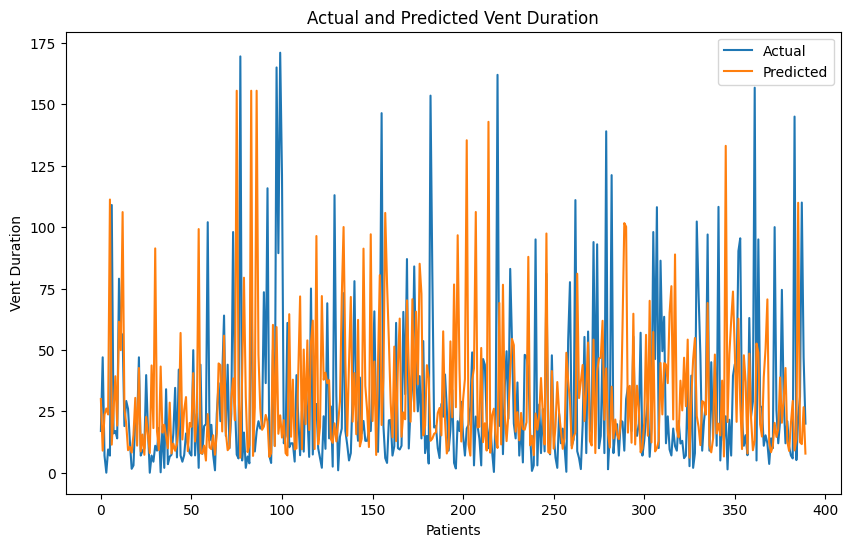

In [285]:
gbr = GradientBoostingRegressor(random_state= 66, n_estimators=200, max_depth=None,learning_rate=0.01)
gbr_model = gbr.fit(X_train, y_train)
y_pred = gbr_model.predict(X_test)
print('GradientBoostingRegressor')
print("r2:", r2_score(y_test,y_pred))
print("rmse:", np.sqrt(mean_absolute_error(y_test,y_pred)))
print("mse:", mean_absolute_error(y_test,y_pred))
print("mae:", mean_absolute_error(y_test,y_pred))
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual and Predicted Vent Duration')
plt.xlabel('Patients')
plt.ylabel('Vent Duration')
plt.legend()
plt.show()

In [271]:
rmse_scorer = make_scorer(mean_squared_error, squared=False)
gbr = GradientBoostingRegressor(random_state=66,n_estimators =200,max_features = 'log2',max_depth=None)
param_grid = {#'n_estimators': [100,200,300],
              'learning_rate': [0.1,0.5],
              #'max_depth': [5,10],
              #'min_samples_split': [2, 5, 7],
              #'min_samples_leaf': [1, 2, 4],
              #'subsample': [0.5, 0.8, 1]
              }
grid_search = GridSearchCV(gbr, param_grid=param_grid,cv =5,scoring=rmse_scorer)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)


{'learning_rate': 0.5}
38.662192646489714


Gradient Boost
r2: -2.2487071459211845
rmse: 5.166742807391063
mse: 26.695231237727278
mae: 26.695231237727278


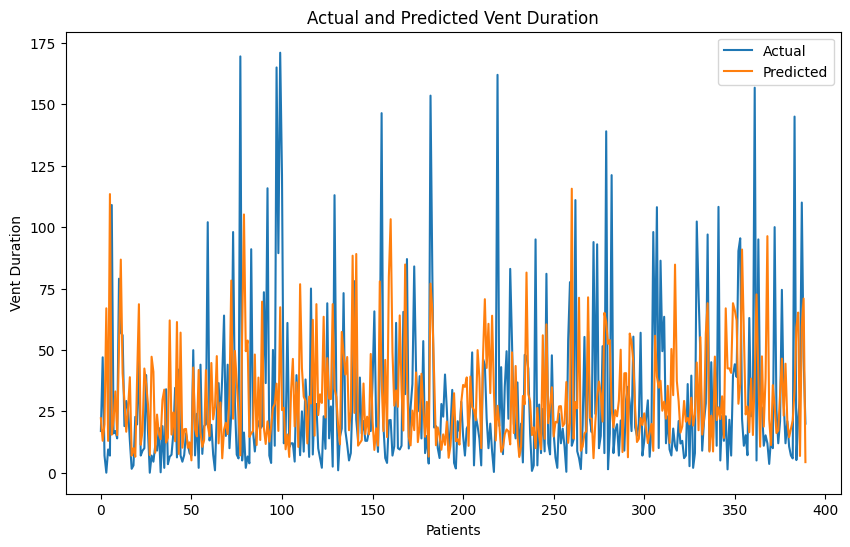

In [272]:
y_pred = grid_search.predict(X_test)
print('Gradient Boost')
print("r2:", r2_score(y_pred,y_test))
print("rmse:", np.sqrt(mean_absolute_error(y_pred,y_test)))
print("mse:", mean_absolute_error(y_pred,y_test))
print("mae:", mean_absolute_error(y_pred,y_test))
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual and Predicted Vent Duration')
plt.xlabel('Patients')
plt.ylabel('Vent Duration')
plt.legend()
plt.show()

In [292]:
rfr = RandomForestRegressor(random_state= 66)
rfr_model = rfr.fit(X_train, y_train)
y_pred = rfr_model.predict(X_test)
print('GradientBoostingRegressor')
print("r2:", r2_score(y_test,y_pred))
print("rmse:", np.sqrt(mean_absolute_error(y_test,y_pred)))
print("mse:", mean_absolute_error(y_test,y_pred))
print("mae:", mean_absolute_error(y_test,y_pred))

GradientBoostingRegressor
r2: -0.06456467508850494
rmse: 4.956388306310284
mse: 24.56578504292933
mae: 24.56578504292933


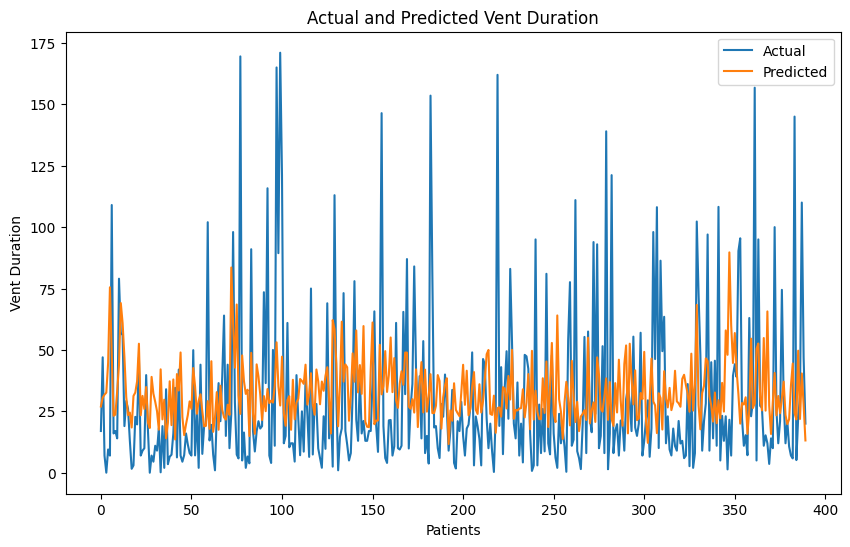

In [209]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual and Predicted Vent Duration')
plt.xlabel('Patients')
plt.ylabel('Vent Duration')
plt.legend()
plt.show()

In [221]:
rmse_scorer = make_scorer(mean_squared_error, squared=False)
rf = RandomForestRegressor(random_state=66,n_estimators=300)
params = {
    #'n_estimators': [100, 300, 500],
    #'max_depth': [10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    #'max_features': ['auto', 'sqrt', 'log2'],
}
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=5, n_jobs=-1, scoring=rmse_scorer)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'min_samples_leaf': 1, 'min_samples_split': 2}
33.31302713249844


Gradient Boost
r2: -7.176846429560932
rmse: 4.960407071935514
mse: 24.605638319307857
mae: 24.605638319307857


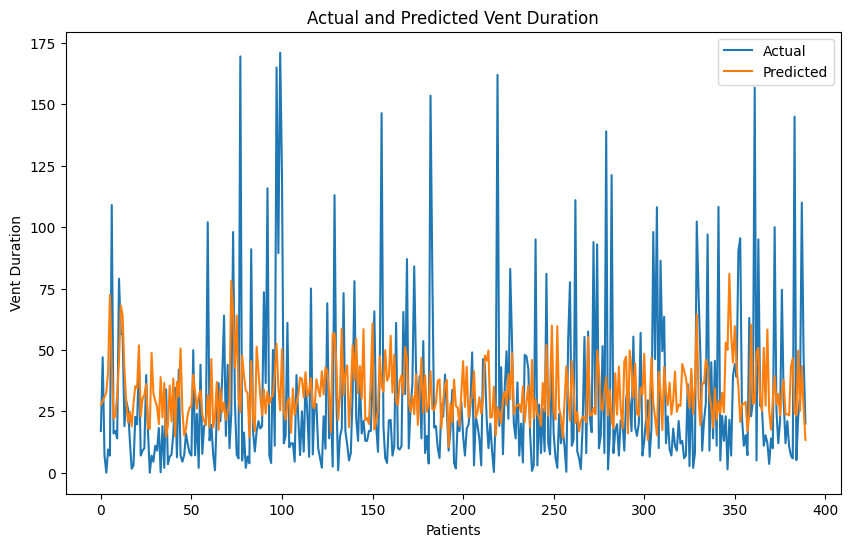

In [223]:
y_pred = grid_search.predict(X_test)
print('Gradient Boost')
print("r2:", r2_score(y_test,y_pred))
print("rmse:", np.sqrt(mean_absolute_error(y_test,y_pred)))
print("mse:", mean_absolute_error(y_test,y_pred))
print("mae:", mean_absolute_error(y_test,y_pred))
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual and Predicted Vent Duration')
plt.xlabel('Patients')
plt.ylabel('Vent Duration')
plt.legend()
plt.show()

Selected Model for Regression

0:	learn: 32.6008649	total: 65.6ms	remaining: 52.4s
1:	learn: 32.5462822	total: 126ms	remaining: 50.4s
2:	learn: 32.4851609	total: 186ms	remaining: 49.5s
3:	learn: 32.4393160	total: 247ms	remaining: 49.1s
4:	learn: 32.3816351	total: 313ms	remaining: 49.8s
5:	learn: 32.3271174	total: 370ms	remaining: 49s
6:	learn: 32.2842122	total: 427ms	remaining: 48.4s
7:	learn: 32.2588435	total: 487ms	remaining: 48.2s
8:	learn: 32.1970657	total: 551ms	remaining: 48.4s
9:	learn: 32.1479218	total: 619ms	remaining: 48.9s
10:	learn: 32.0925130	total: 679ms	remaining: 48.7s
11:	learn: 32.0200000	total: 739ms	remaining: 48.5s
12:	learn: 31.9763169	total: 798ms	remaining: 48.3s
13:	learn: 31.9329783	total: 856ms	remaining: 48.1s
14:	learn: 31.8777065	total: 913ms	remaining: 47.8s
15:	learn: 31.8318200	total: 970ms	remaining: 47.5s
16:	learn: 31.7717331	total: 1.03s	remaining: 47.4s
17:	learn: 31.7091879	total: 1.09s	remaining: 47.6s
18:	learn: 31.6875431	total: 1.1s	remaining: 45.2s
19:	learn: 31.6286358	to

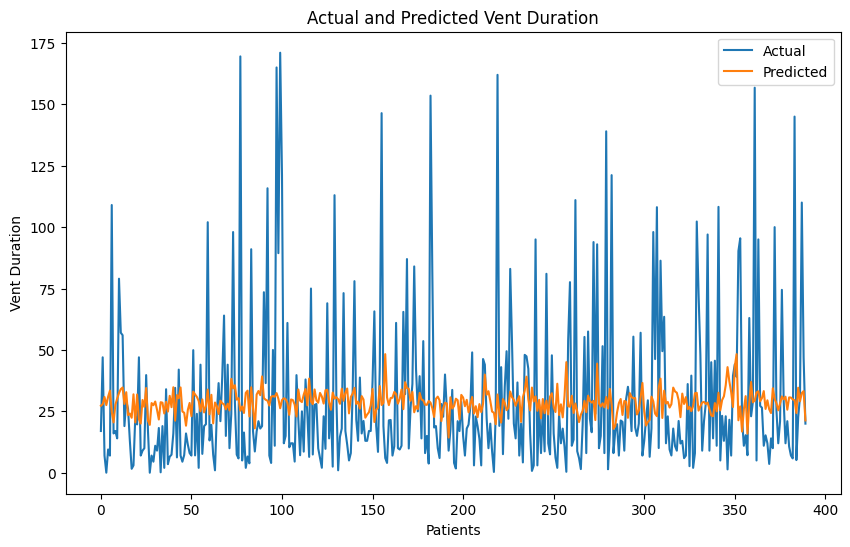

In [342]:
cbr = CatBoostRegressor(random_state= 66,n_estimators=800,learning_rate=0.01,depth = 13)
cbr_model = cbr.fit(X_train, y_train)
y_pred = cbr_model.predict(X_test)
print('CatBoostRegressor')
print("r2:", r2_score(y_test,y_pred))
print("rmse:", np.sqrt(mean_absolute_error(y_test,y_pred)))
print("mse:", mean_absolute_error(y_test,y_pred))
print("mae:", mean_absolute_error(y_test,y_pred))
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual and Predicted Vent Duration')
plt.xlabel('Patients')
plt.ylabel('Vent Duration')
plt.legend()
plt.show()
